In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.signal import detrend 
import warnings
warnings.filterwarnings("ignore")

Calibrating corner points
Number of frames: 1610


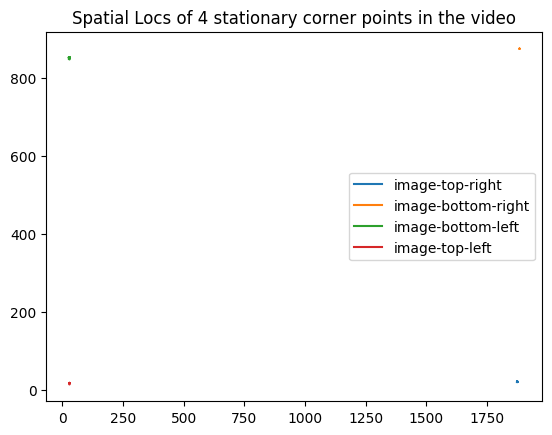

Image top right: (1875.09, 20.05)
Image bot right: (1884.99, 875.01)
Image bot left: (28.74, 851.7)
Image top left: (29.03, 16.94)


'\nBasically the image axes in pixels are:\norigin is at the top left corner\nincreases towards the right and bottom\n'

In [2]:
print('Calibrating corner points')

filename = "12_38_1_digitisation/12_38_1_corner_data_xypts.csv"
df = pd.read_csv(filename)
df.fillna(method='ffill', inplace=True)
print("Number of frames:", len(df))


plt.plot(df['pt1_cam1_X'], df['pt1_cam1_Y'])
plt.plot(df['pt2_cam1_X'], df['pt2_cam1_Y'])
plt.plot(df['pt3_cam1_X'], df['pt3_cam1_Y'])
plt.plot(df['pt4_cam1_X'], df['pt4_cam1_Y'])
plt.legend(['image-top-right', 'image-bottom-right', 'image-bottom-left', 'image-top-left'])
plt.title('Spatial Locs of 4 stationary corner points in the video')
plt.show()

print(f"Image top right: ({round(df['pt1_cam1_X'].mean(), 2)}, {round(df['pt1_cam1_Y'].mean(), 2)})")
print(f"Image bot right: ({round(df['pt2_cam1_X'].mean(), 2)}, {round(df['pt2_cam1_Y'].mean(), 2)})")
print(f"Image bot left: ({round(df['pt3_cam1_X'].mean(), 2)}, {round(df['pt3_cam1_Y'].mean(), 2)})")
print(f"Image top left: ({round(df['pt4_cam1_X'].mean(), 2)}, {round(df['pt4_cam1_Y'].mean(), 2)})")

top_right_x = df['pt1_cam1_X'].mean()
top_right_y = df['pt1_cam1_Y'].mean()
bot_left_x = df['pt3_cam1_X'].mean()
bot_left_y = df['pt3_cam1_Y'].mean()

'''
Basically the image axes in pixels are:
origin is at the top left corner
increases towards the right and bottom
'''

In [3]:
print('Obtaining all data required for analyses')

filename = "12_38_1_digitisation/12_38_1_rod_outer_weight_arrow_data_xypts.csv"
df = pd.read_csv(filename)
df.fillna(method='ffill', inplace=True)

filename_angle = "12_38_1_digitisation/12_38_1_angle_setter_data_xypts.csv"
df_angle = pd.read_csv(filename_angle)
df_angle.fillna(method='ffill', inplace=True)

filename_mat = "12_38_1_digitisation/12_38_1_rod_mat2_data_xypts.csv"
df_mat = pd.read_csv(filename_mat)
df_mat.fillna(method='ffill', inplace=True)

data = {
    'rod_x': df['pt1_cam1_X'],
    'rod_y': df['pt1_cam1_Y'],
    'ow_x': df['pt2_cam1_X'],
    'ow_y': df['pt2_cam1_Y'],
    'arrow_x': df['pt3_cam1_X'],
    'arrow_y': df['pt3_cam1_Y'],
    'com_mid_x': (df['pt1_cam1_X']+df['pt2_cam1_X'])/2,
    'com_mid_y': (df['pt1_cam1_Y']+df['pt2_cam1_Y'])/2
}
c_data = {
    'mat_right_x': df_mat['pt2_cam1_X'],
    'mat_right_y': df_mat['pt2_cam1_Y'],
    'mat_left_x': df_mat['pt3_cam1_X'],
    'mat_left_y': df_mat['pt3_cam1_Y'],
    'angle_set_top_x': df_angle['pt1_cam1_X'],
    'angle_set_top_y': df_angle['pt1_cam1_Y'],
    'angle_set_bot_x': df_angle['pt2_cam1_X'],
    'angle_set_bot_y': df_angle['pt2_cam1_Y'],
    'fps': 240,
    'ramp_angle': 4,
    'inter_leg_offset': 30,
    'len_mat_mm': 39,
    'mass': 0.029,
    'g': 9.80665,
    'no_of_frames': len(df),
    'frames': list(range(1, len(df)+1)),
}
c_data['time'] = [frame/c_data['fps'] for frame in list(c_data['frames'])]
print(f'Number of frames:', len(c_data['time']))
print(f'Number of seconds:', round(c_data['time'][-1], 2))


Obtaining all data required for analyses
Number of frames: 1610
Number of seconds: 6.71


Investigating different reference axes


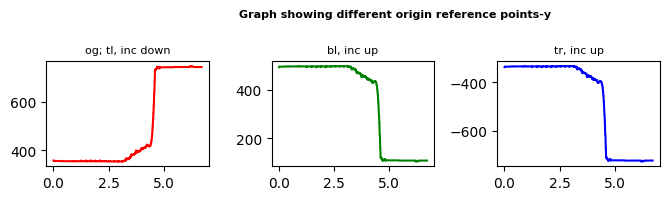

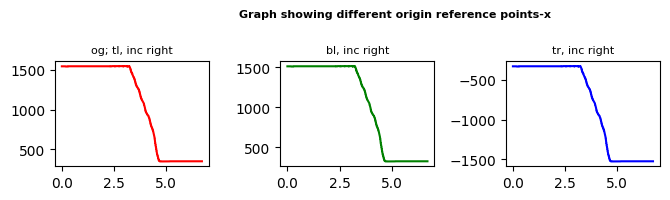

WE WILL BE USING THE BOTTOM LEFT ORIGIN REF POINT (green fig)
x increases from left to right, y increases from bottom to top - normal kind


In [4]:
print("Investigating different reference axes")
bl_ref_y = bot_left_y - data['rod_y']
tr_ref_y = top_right_y - data['rod_y']

fig, axs = plt.subplots(1, 3, figsize=(8, 2))
fig.suptitle("Graph showing different origin reference points-y", fontsize=8, fontweight='bold')

axs[0].plot(c_data['time'], data['rod_y'], 'r', label='og; ul, inc down')
axs[1].plot(c_data['time'], bl_ref_y, 'g', label='bl, inc up')
axs[2].plot(c_data['time'], tr_ref_y, 'b', label='ur, inc up')
axs[0].set_title('og; tl, inc down', fontsize=8)
axs[1].set_title('bl, inc up', fontsize=8)
axs[2].set_title('tr, inc up', fontsize=8)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

#---- x ----#
bl_ref_x = data['rod_x'] - bot_left_x
tr_ref_x = data['rod_x'] - top_right_x

fig, axs = plt.subplots(1, 3, figsize=(8, 2))
fig.suptitle("Graph showing different origin reference points-x", fontsize=8, fontweight='bold')

axs[0].plot(c_data['time'], data['rod_x'], 'r', label='og; ul, inc down')
axs[1].plot(c_data['time'], bl_ref_x, 'g', label='bl, inc up')
axs[2].plot(c_data['time'], tr_ref_x, 'b', label='ur, inc up')
axs[0].set_title('og; tl, inc right', fontsize=8)
axs[1].set_title('bl, inc right', fontsize=8)
axs[2].set_title('tr, inc right', fontsize=8)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

#-----------#
print("WE WILL BE USING THE BOTTOM LEFT ORIGIN REF POINT (green fig)")
print("x increases from left to right, y increases from bottom to top - normal kind")

c_data['bot_left_y'] = bot_left_y
c_data['bot_left_x'] = bot_left_x
for key, value in data.items():
    if key[-1] == 'y':
        data[key] = bot_left_y - data[key]
    elif key[-1] == 'x':
        data[key] = data[key] - bot_left_x
for key, value in c_data.items():
    if key[-1] == 'y':
        c_data[key] = bot_left_y - c_data[key]
    elif key[-1] == 'x':
        c_data[key] = c_data[key] - bot_left_x


In [5]:
print('Save Pixel Data')
# no_frames = c_data['no_of_frames'] 
# save_data = data | c_data

# for key, value in save_data.items():
#     if isinstance(value, (int, float)):
#         save_data[key] = [value]*no_frames

# save_df = pd.DataFrame(save_data)
# save_df.to_csv("12_38_1_digitisation/pixel_data_correct_ref.csv", index=False)

Save Pixel Data


In [6]:
print('Pixel to mm conversion using mat')
right_end_X = c_data['mat_right_x'].mean().item()
right_end_Y = c_data['mat_right_y'].mean().item()
left_end_X = c_data['mat_left_x'].mean().item()
left_end_Y = c_data['mat_left_y'].mean().item()

c_data['len_mat_pix'] = math.sqrt(((right_end_X-left_end_X)**2) + ((right_end_Y-left_end_Y)**2))
c_data['one_pix_in_mm'] = c_data['len_mat_mm']/c_data['len_mat_pix']

print("Right end of the mat coords:", (round(right_end_X, 2), round(right_end_Y, 2)))
print("Left end of the mat coords:", (round(left_end_X, 2), round(left_end_Y, 2)))
print("Length of mat in pixels:", round(c_data['len_mat_pix'], 2), "pixels")
print("One pixel in mm:", c_data['one_pix_in_mm'], "mm")

Pixel to mm conversion using mat
Right end of the mat coords: (1477.92, 129.69)
Left end of the mat coords: (1347.62, 121.37)
Length of mat in pixels: 130.56 pixels
One pixel in mm: 0.2987045832491211 mm


In [7]:
print('Calculate Angle Setter length')
angle_set_top_X = c_data['angle_set_top_x'].mean().item()
angle_set_top_Y = c_data['angle_set_top_y'].mean().item()
angle_set_bot_X = c_data['angle_set_bot_x'].mean().item()
angle_set_bot_Y = c_data['angle_set_bot_y'].mean().item()

c_data['len_angle_set_pix'] = math.sqrt(((angle_set_top_X-angle_set_bot_X)**2) + ((angle_set_top_Y-angle_set_bot_Y)**2))
c_data['len_angle_set_mm'] =  c_data['len_angle_set_pix'] * c_data['one_pix_in_mm']
print(f"Length of angle set in pixels: {round(c_data['len_angle_set_pix'], 2)}")
print(f"Length of angle set in mm: {round(c_data['len_angle_set_mm'], 2)}")

Calculate Angle Setter length
Length of angle set in pixels: 147.76
Length of angle set in mm: 44.14


In [8]:
print('Rod, outer weight, arrow data, and com_mid converted to mm; save mm data')
data_mm = {}
for key, _ in data.items():
    data_mm[key] = data[key]*c_data['one_pix_in_mm']

# save_df = pd.DataFrame(data_mm)
# save_df.to_csv("12_38_1_digitisation/mm_data_correct_ref.csv", index=False)


Rod, outer weight, arrow data, and com_mid converted to mm; save mm data


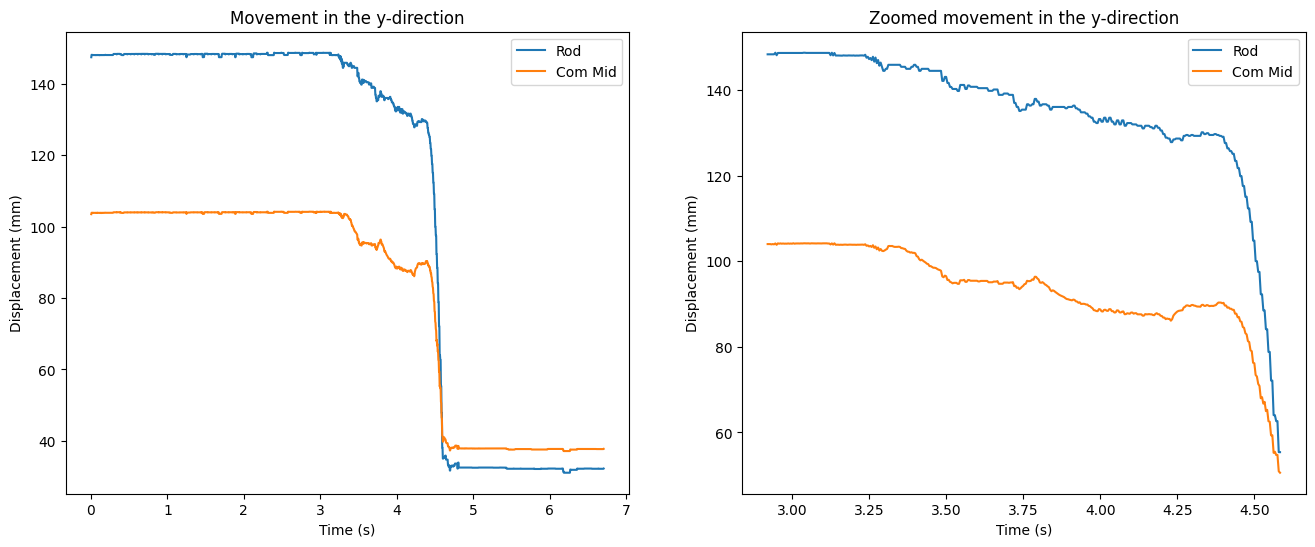

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].plot(c_data['time'], data_mm['rod_y'], label='Rod')
axs[0].plot(c_data['time'], data_mm['com_mid_y'], label='Com Mid')
axs[1].plot(c_data['time'][700:1100], data_mm['rod_y'][700:1100], label='Rod')
axs[1].plot(c_data['time'][700:1100], data_mm['com_mid_y'][700:1100], label='Com Mid')

axs[0].set_title('Movement in the y-direction')
axs[0].legend()
axs[1].set_title('Zoomed movement in the y-direction')
axs[1].legend()
for ax in axs:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Displacement (mm)')

plt.show()

Calculating PE | detrend methods


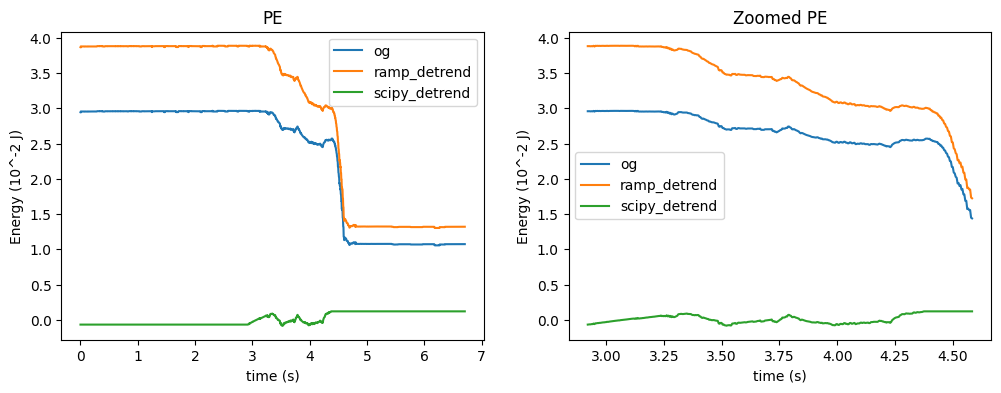

Will be using scipy's detrend method to detrend PE


In [10]:
print('Calculating PE | detrend methods')
estimated_com_y = data_mm['com_mid_y']
estimated_com_x = data_mm['com_mid_x']
# estimated_com_y = data_mm['rod_y'].copy()
# estimated_com_x = data_mm['rod_x'].copy()

estimated_com_y /= 1000
estimated_com_x /= 1000

potential_E_trend = c_data['mass'] * c_data['g'] * estimated_com_y
potential_E_ramp_detrend = c_data['mass'] * c_data['g'] * (estimated_com_y + math.tan(c_data['ramp_angle']*math.pi/180) * estimated_com_x)

potential_E_scipy_detrend = potential_E_ramp_detrend.copy()
potential_E_scipy_detrend[700:1050] = detrend(np.array(potential_E_trend[700:1050]))
potential_E_scipy_detrend[:700] = potential_E_scipy_detrend[700]
potential_E_scipy_detrend[1050:] = potential_E_scipy_detrend[1049]

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(c_data['time'], potential_E_trend * 10**2, label='og')
axs[0].plot(c_data['time'], potential_E_ramp_detrend * 10**2, label='ramp_detrend')
axs[0].plot(c_data['time'], potential_E_scipy_detrend * 10**2, label='scipy_detrend')

axs[0].set_xlabel('time (s)')
axs[0].set_ylabel('Energy (10^-2 J)')
axs[0].set_title("PE")
axs[0].legend()

#------------------#
axs[1].plot(c_data['time'][700:1100], potential_E_trend[700:1100] * 10**2, label='og')
axs[1].plot(c_data['time'][700:1100], potential_E_ramp_detrend[700:1100] * 10**2, label='ramp_detrend')
axs[1].plot(c_data['time'][700:1100], potential_E_scipy_detrend[700:1100] * 10**2, label='scipy_detrend')

axs[1].set_xlabel('time (s)')
axs[1].set_ylabel('Energy (10^-2 J)')
axs[1].set_title("Zoomed PE")
axs[1].legend()

plt.show()

print("Will be using scipy's detrend method to detrend PE")
potential_E = potential_E_scipy_detrend

In [11]:
print("Calculating KE")
v_x = np.gradient(estimated_com_x, c_data['time'])
v_y = np.gradient(estimated_com_y, c_data['time'])
window_size = 10
vx_smoothed = np.convolve(v_x, np.ones(window_size)/window_size, mode='same')
vy_smoothed = np.convolve(v_y, np.ones(window_size)/window_size, mode='same')
kinetic_E = 0.5 * c_data['mass'] * (vx_smoothed**2 + vy_smoothed**2)

Calculating KE


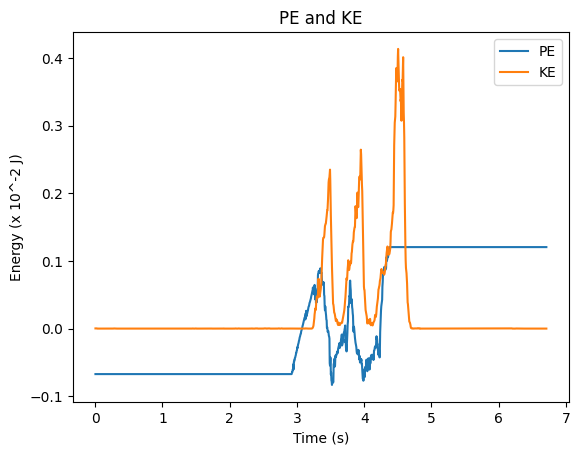

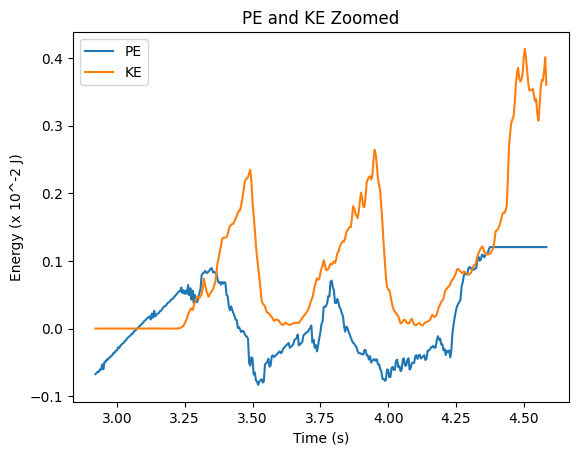

In [12]:
# Energy Plots
fig1, axs = plt.subplots(1, 1)

axs.plot(c_data['time'], potential_E * 10**2, label='PE')
axs.plot(c_data['time'], kinetic_E * 10**2, label='KE')
axs.set_xlabel('Time (s)')
axs.set_ylabel('Energy (x 10^-2 J)')
axs.set_title("PE and KE")
axs.legend()
# fig1.savefig("figures/PE_KE_full.png", dpi=300)

# #------------------
fig2, axs = plt.subplots(1, 1)
axs.plot(c_data['time'][700:1100], potential_E[700:1100] * 10**2, label='PE')
axs.plot(c_data['time'][700:1100], kinetic_E[700:1100] * 10**2, label='KE')
axs.set_xlabel('Time (s)')
axs.set_ylabel('Energy (x 10^-2 J)')
axs.set_title("PE and KE Zoomed")
axs.legend()
# fig2.savefig("figures/PE_KE_zoomed.png", dpi=300)

plt.show()

Obtaining Interleg Angle
Initial Offset 30.32


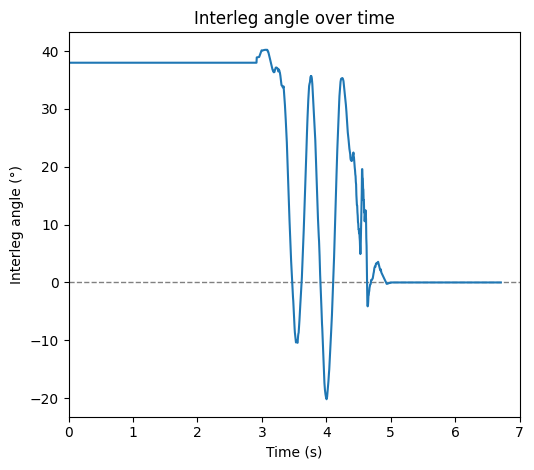

In [13]:
print("Obtaining Interleg Angle")

rod_to_arrow_x = data_mm['arrow_x'] - data_mm['rod_x']
rod_to_arrow_y = data_mm['arrow_y'] - data_mm['rod_y']

rod_to_ow_x = data_mm['ow_x'] - data_mm['rod_x']
rod_to_ow_y = data_mm['ow_y'] - data_mm['rod_y']

dot_prod = rod_to_arrow_x*rod_to_ow_x + rod_to_arrow_y*rod_to_ow_y
mag_rod_to_arrow = np.sqrt(rod_to_arrow_x**2 + rod_to_arrow_y**2)
mag_rod_to_ow = np.sqrt(rod_to_ow_x**2 + rod_to_ow_y**2)
cos_theta = dot_prod/(mag_rod_to_ow*mag_rod_to_arrow)

cos_theta = np.clip(cos_theta, -1, 1)
inter_leg_rad = np.arccos(cos_theta)

cross_product = (rod_to_arrow_x*rod_to_ow_y) - (rod_to_arrow_y*rod_to_ow_x)
inter_leg_rad_sign = np.sign(cross_product) * inter_leg_rad

inter_leg_deg_sign = np.degrees(inter_leg_rad_sign)

initial_offset =  38 - inter_leg_deg_sign[100:700].mean()
inter_leg_deg_sign += initial_offset

window_size = 20
inter_leg_deg_smoothed = np.convolve(inter_leg_deg_sign, np.ones(window_size)/window_size, mode='same')
inter_leg_deg_smoothed[:700] = 38
inter_leg_deg_smoothed[1200:] = 0

# for i in range(700, len(inter_leg_deg_smoothed), 50):
#     print(i, inter_leg_deg_smoothed[i])

print('Initial Offset', round(initial_offset, 2))
plt.plot(range(0, 1600), [0]*1600, color='grey', linestyle='dashed', linewidth=1, label="Grey Dotted Line")
plt.plot(c_data['time'], inter_leg_deg_smoothed)
plt.title('Interleg angle over time')
plt.xlabel('Time (s)')
plt.ylabel('Interleg angle (°)')
plt.xlim([0, 7])

plt.tight_layout(rect=[0, 0, 0.85, 1])
# plt.savefig("figures/Interleg angle over time", dpi=300)
plt.show()